# Sieci Neuronowe z Keras
##### Przygotował: Jan Karaś

<br>

Wprowadzenie w praktycnzy aspekt korzystania z Sieci Neuronowych. Z tego notatnika dowiesz się jak:
- skonfigurować sobie środowisko pracy, tak aby uniknąć irytujących problemów
- czym jest Keras i jak za jego pomocą tworzyć sieci neuronowe
- udoskonalać i zapysywać wytrenowaną sieć

# Konfiguracja

###  Środowisko wirtualne oraz dodanie go do Notatnika Jupyter
<div class="alert alert-block alert-info">
<b>Wskazówka</b> Najlepiej wszystkie komendy i proces instalacji zrobić w Anaconda Prompt. W notatnikach Jupyter nie widać postępów i dłużące się czekanie może być uciążliwe.
</div>

Aby stworzyć wirtualne środowisko dla swojego projektu a następnie dodać je do notatnika jupyter wykonaj poniższe polecenia w konsoli:
<div class="alert alert-block alert-success" style="font-family: monospace">
conda create --name twojaNazwa<br>
conda activate twojaNazwa<br>
conda install -c anaconda ipykernel<br>
python -m ipykernel install --user --name=twojaNazwa<br>
</div>

### Instalacja bibliotek
Będziemy korzystać z różnych bibliotek, ich ilość na początku może być przytłaczająca, ale nie należy się tym przejmować. Z czasem oswoisz się z tym, że instaluje się ich tak wiele. W tym projekcie będziemy korzystać z:
- tensorflow - sieci neuronowe
- keras - api ułatwiające korzystanie z tensorflow
- matplotlib - wykresy
- padnas - zapisywanie, wyświetlanie i obsługa tabelek z danymi
- numpy - operacje numeryczne
- kaggle - obsługiwanie pobierania danych ze strony kaggle
- opencv - przekształcanie obrazów np. do skali szarości

Aby zainstalować wymienione bibioteki wpisz w anaconda propmt następujące komendy (pamiętaj, aby robić to z aktywnyn środowiskiem wirtualnym, które przed chwilą stworzyłeś):
<div class="alert alert-block alert-success" style="font-family: monospace">
    <b> Opcja 1 - instalacja poprzez użycie requirements.txt</b> <br>
    pip install -r requirements.txt
</div>

<div class="alert alert-block alert-success" style="font-family: monospace">
    <b> Opcja 2 - instalacja poszczególnych bibliotek</b> <br>
    conda install tensorflow <br>
    conda install keras <br>
    conda install matplotlib <br>
    conda install -c conda-forge matplotlib<br>
    conda install numpy <br>
    conda install -c menpo opencv
</div>

In [1]:
import tensorflow as tf
import keras

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import cv2
import numpy as np

### Nasz cel
Będziemy korzystać ze zbioru CIFAR-10. Jest to zbiór zawierający obrazki o wymiarach 32 na 32 piksele, wraz z etykietami. Istnieje 10 różnych etykiet (stąd nazwa zbioru). Jest to jeden z najbardziej znanych zbiorów wykorzysytwanych do celów edukacyjnych. Będziemy przewidywać do której klasy należy dany obrazek.

Dla sprawdzenia samego siebie możesz swoje predykcje przesłać do strony Kaggle i zobaczyć jaką pozycję uzyskasz w rankingu: https://www.kaggle.com/competitions/cifar-10

Najprościej jednak będzie zaimportować ten zbiór z modułu tensorflow do którego jest dołączony.

# Sieć Neuronowa
###  Pobranie i przygotowanie danych

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
# Wydzielanie zbioru walidacyjnego.
y_train, y_valid = y_train[:40_000], y_train[40_000:]

from tensorflow.keras.utils import to_categorical
# One hot encoding.
y_train = to_categorical(y_train, num_classes=10)
y_valid = to_categorical(y_valid, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Podział obrazków na zbiór treningowy i walidacyjny. Przeskalowanie zbiorów.
scaler = lambda data: np.float32(data / 255.0)
x_train, x_valid, x_test = scaler(x_train[:40_000]), scaler(x_train[40_000:]), scaler(x_test)

In [7]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# fig, ax = plt.subplots(1, 10, figsize=(25, 25))
# for i in range(10):
#      ax[i].imshow(x_train[i])
#      ax[i].set_title(labels[int(y_train[i][0])], color='red', fontsize=22)
#      ax[i].axis('off')

In [8]:
x_train.shape

(40000, 32, 32, 3)

### Przekształcanie do skali szarości (redukcja liczby wymiarów)

In [11]:
x_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_train])
x_valid = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_valid])
x_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_test])

Ilość wymiarów została zmniejszona. Zauważmy, że teraz krotka <b style="font-family: monospace"> x_train.shape </b> ma tylko 3 wymiary a nie 4 jak poprzednio. Nie ma już wymiaru opisującego poszczególne kolory. Pozostały nam wymiary opisujące liczbę próbek (40000), oraz wysokość i szerokość obrazka (32).

In [10]:
x_train.shape

(40000, 32, 32)

Zobaczmy jak teraz prezentują się obrazki spłaszczone do jednego wymiaru.

In [ ]:
for x in [x_train, x_test, x_valid]:
    print(x.shape)

for y in [y_train, y_test, y_valid]:
    print(y.shape)

In [11]:
# fig, ax = plt.subplots(1, 10, figsize=(25, 25))
# for i in range(10):
#      ax[i].imshow(x_train[i], cmap='gray')
#      ax[i].set_title(labels[int(y_train[i][0])], color='red', fontsize=22)
#      ax[i].axis('off')

### Budowanie Sieci przy urzyciu interfejsu Sequential
Wybrałem ten interejs ponieważ jest najprostszy w użyciu a nasz problem nie wymaga od nas tworzenia skomplikowanych struktur. W przyszłości na pewno zetkniesz się z interfejsem funkcyjnym, który pozwala na przykład zrobić kilka warst wejściowych do sieci.
<div class="alert alert-block alert-info">
<b>Wskazówka</b> Na początek zaczynam od bardzo prostej sieci, żeby szybko sprawdzić jakie przynosi efekty...
</div>


In [12]:
naive_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 1]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

- Warstwa <b><span style="color:red">Flatten</span></b> zmienia wymiary danych wejściowych w 1D wektor
- Warstwa <b><span style="color:red">Dense</span></b> służy wyłapywaniu wzorców w obrazie
- Ostatnia warstwa wykorzystuje funkcje aktywacyjną <b><span style="color:red">softmax</span></b> aby suma wyników była równa 1. Wynika to z faktu, że przewidujemy przynależność do jednej z 10 klas.

In [13]:
naive_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 30)                30750     
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
Total params: 31,060
Trainable params: 31,060
Non-trainable params: 0
_________________________________________________________________


In [14]:
naive_model.compile(optimizer='sgd',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

Podczas kompilacji określamy takie parametry jak:
- optymalizator, ja skorzystałem tutaj z omawianego na wcześniejszych prezentacjach Stochastycznego Gradientu Prostego. Istnieje jednak jeszcze wiele innych optymalizatorów
- loss (funcka straty)
- metryki, którymi będziemy oceniać nasz model

In [15]:
history = naive_model.fit(x_train,
                    y_train,
                    epochs=3,
                    batch_size=32,
                    validation_data=(x_valid, y_valid))

Epoch 1/3
1250/1250 [==============================] - 4s 2ms/step - loss: 2.1612 - accuracy: 0.2085 - val_loss: 2.0763 - val_accuracy: 0.2441
Epoch 2/3
1250/1250 [==============================] - 3s 2ms/step - loss: 2.0438 - accuracy: 0.2709 - val_loss: 2.0193 - val_accuracy: 0.2837
Epoch 3/3
1250/1250 [==============================] - 3s 2ms/step - loss: 1.9924 - accuracy: 0.2950 - val_loss: 1.9806 - val_accuracy: 0.3030


In [30]:
df = pd.DataFrame.from_dict(history.history)
df.to_csv('naive_model.csv')

In [18]:
# df.plot()

In [20]:
naive_model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 1.9801 - accuracy: 0.3084


[1.980126142501831, 0.3084000051021576]

Jak widzimy nasz model nie radzi sobie najlepiej. Jego dokładność dla zbioru walidacyjnego to zaledwie 30%, pomimo, prostoty zadania. Wynika to z tego, że sieć jest bardzo prosta i nie jest w stanie wyłapać wzorców pozwalających na rozpoznawanie obrazów odpowiednio dostosowując swoje wagi. Inaczej mówiąc jest <b><span style="color:red">niedotrenowana.</span></b>

Rozwiązanie w tym przypadku jest dość proste:
- Dodamy kolejne warstwy
- Zwiększymy liczbę neuronów
- Będziemy trenować przez większą liczbę epok
- Możemy zmienić hiperparametry modelu

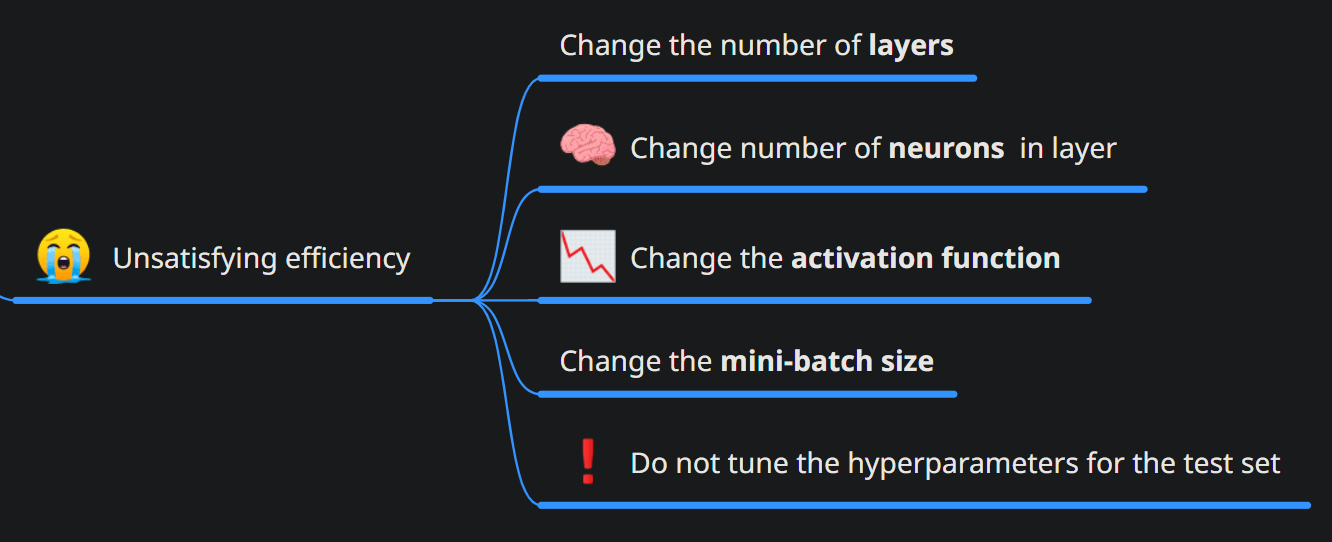


### Przetrenowany model
Dodanie większej liczby warst oraz dłuższe szkolenie wcale nie musi zagwarantować sukcesu. Problem niedotrenowania zmienimy na problem <b><span style="color:red">przetrenowania</span></b> modelu. Możemy to poznać po tym, że wynik dokładności (accuracy) dla zbioru walidacyjnego różni się znacznie od dokładności dla zbioru treningowego. Zobaczmy...

In [31]:
better_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 1]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(400, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [32]:
better_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 1024)              0         
                                                                 
 dense_7 (Dense)             (None, 100)               102500    
                                                                 
 dense_8 (Dense)             (None, 200)               20200     
                                                                 
 dense_9 (Dense)             (None, 200)               40200     
                                                                 
 dense_10 (Dense)            (None, 400)               80400     
                                                                 
 dense_11 (Dense)            (None, 50)                20050     
                                                                 
 dense_12 (Dense)            (None, 10)               

In [33]:
better_model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [37]:
history = better_model.fit(x_train,
                    y_train,
                    epochs=40,
                    batch_size=64,
                    validation_data=(x_valid, y_valid))

Epoch 1/40
625/625 [==============================] - 3s 5ms/step - loss: 1.3555 - accuracy: 0.5145 - val_loss: 1.7415 - val_accuracy: 0.4114
Epoch 2/40
625/625 [==============================] - 3s 5ms/step - loss: 1.3172 - accuracy: 0.5261 - val_loss: 1.8105 - val_accuracy: 0.4050
Epoch 3/40
625/625 [==============================] - 3s 5ms/step - loss: 1.2871 - accuracy: 0.5393 - val_loss: 1.8241 - val_accuracy: 0.3989
Epoch 4/40
625/625 [==============================] - 3s 5ms/step - loss: 1.2600 - accuracy: 0.5487 - val_loss: 1.8410 - val_accuracy: 0.4050
Epoch 5/40
625/625 [==============================] - 3s 5ms/step - loss: 1.2307 - accuracy: 0.5586 - val_loss: 1.8445 - val_accuracy: 0.3962
Epoch 6/40
625/625 [==============================] - 4s 6ms/step - loss: 1.1960 - accuracy: 0.5689 - val_loss: 1.9035 - val_accuracy: 0.4066
Epoch 7/40
625/625 [==============================] - 3s 5ms/step - loss: 1.1559 - accuracy: 0.5874 - val_loss: 1.9156 - val_accuracy: 0.3973
Epoch 

In [35]:
better_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.7778 - accuracy: 0.4089


[1.7778316736221313, 0.4088999927043915]

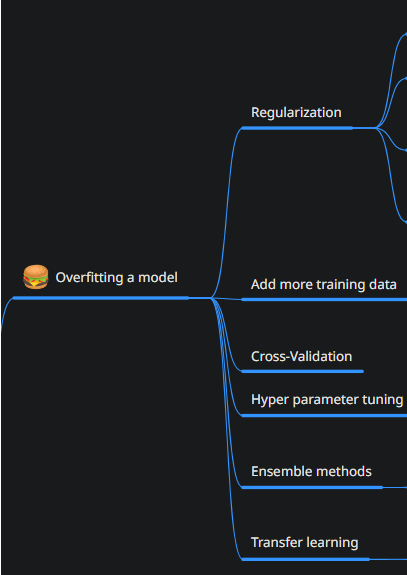

In [38]:
df = pd.DataFrame.from_dict(history.history)
df.to_csv('better_model.csv')

### Siec Konwolucyjna
Jedną z możliwości będzie tutaj zastosowanie Sieci Konwolucyjnej. Samo jej zastosowanie nie gwarantuje jednak sukcesu. Oczywiście wyniki się poprawią, ale nadal model ulegnie przetrenowaniu.

In [39]:
cnn = keras.models.Sequential([
    keras.layers.Conv2D(filters=10, kernel_size=(4, 4), input_shape=[32, 32, 1], activation='relu'),
    keras.layers.Flatten(input_shape=[32, 32, 1]),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

cnn.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [40]:
history = cnn.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(x_valid, y_valid))

Epoch 1/20
1250/1250 [==============================] - 20s 16ms/step - loss: 1.6799 - accuracy: 0.3961 - val_loss: 1.5313 - val_accuracy: 0.4622
Epoch 2/20
1250/1250 [==============================] - 19s 15ms/step - loss: 1.3666 - accuracy: 0.5179 - val_loss: 1.3708 - val_accuracy: 0.5204
Epoch 3/20
1250/1250 [==============================] - 19s 15ms/step - loss: 1.1841 - accuracy: 0.5834 - val_loss: 1.3277 - val_accuracy: 0.5436
Epoch 4/20
1250/1250 [==============================] - 19s 16ms/step - loss: 1.0302 - accuracy: 0.6413 - val_loss: 1.3144 - val_accuracy: 0.5423
Epoch 5/20
1250/1250 [==============================] - 20s 16ms/step - loss: 0.8689 - accuracy: 0.6973 - val_loss: 1.3086 - val_accuracy: 0.5635
Epoch 6/20
1250/1250 [==============================] - 19s 15ms/step - loss: 0.7187 - accuracy: 0.7517 - val_loss: 1.4170 - val_accuracy: 0.5639
Epoch 7/20
1250/1250 [==============================] - 19s 15ms/step - loss: 0.5744 - accuracy: 0.8059 - val_loss: 1.5293 -

In [41]:
pd.DataFrame.from_dict(history.history).to_csv('cnn.csv')

### Kolejny model...

In [42]:
final = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), input_shape=[32, 32, 1], activation='relu', padding='same'),
    keras.layers.Dropout(0.3),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(filters=64, kernel_size=(2, 2), input_shape=[32, 32, 1], activation='relu', padding='same'),
    keras.layers.Dropout(0.3),
    keras.layers.BatchNormalization(),
    
    keras.layers.Flatten(input_shape=[32, 32, 1]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [43]:
final.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [44]:
final.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        320       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        8256      
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                      

In [48]:
checkpoint = keras.callbacks.ModelCheckpoint("final_model.h5", save_best_only=True)
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)

final_history = cnn.fit(x_train, y_train, epochs=50, validation_data=(x_valid, y_valid),
                        callbacks=[checkpoint, early_stop])

Epoch 1/50
1250/1250 [==============================] - 19s 15ms/step - loss: 0.0589 - accuracy: 0.9806 - val_loss: 4.4962 - val_accuracy: 0.5188
Epoch 2/50
1250/1250 [==============================] - 18s 15ms/step - loss: 0.0621 - accuracy: 0.9805 - val_loss: 4.4704 - val_accuracy: 0.5392
Epoch 3/50
1250/1250 [==============================] - 19s 15ms/step - loss: 0.0535 - accuracy: 0.9833 - val_loss: 4.4815 - val_accuracy: 0.5288
Epoch 4/50
1250/1250 [==============================] - 19s 15ms/step - loss: 0.0540 - accuracy: 0.9829 - val_loss: 4.6233 - val_accuracy: 0.5251
Epoch 5/50
1250/1250 [==============================] - 18s 15ms/step - loss: 0.0426 - accuracy: 0.9861 - val_loss: 4.7080 - val_accuracy: 0.5307
Epoch 6/50
1250/1250 [==============================] - 18s 15ms/step - loss: 0.0520 - accuracy: 0.9840 - val_loss: 4.6577 - val_accuracy: 0.5313


In [47]:
pd.DataFrame.from_dict(final_history.history).to_csv('final.csv')

In [10]:
x_train.shape

(40000, 32, 32, 3)

In [13]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[32,32, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer="nadam", metrics=["accuracy"])

checkpoint = keras.callbacks.ModelCheckpoint("final_model.h5", save_best_only=True)
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)
final_history = model.fit(x_train, y_train, epochs=50, validation_data=(x_valid, y_valid),
                        callbacks=[checkpoint, early_stop])

Epoch 1/50
1250/1250 [==============================] - 301s 239ms/step - loss: 2.3029 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1014
Epoch 2/50
1250/1250 [==============================] - 297s 237ms/step - loss: 2.3028 - accuracy: 0.0972 - val_loss: 2.3028 - val_accuracy: 0.0952
Epoch 3/50
1250/1250 [==============================] - 297s 238ms/step - loss: 2.3028 - accuracy: 0.0991 - val_loss: 2.3028 - val_accuracy: 0.0952
Epoch 4/50
1250/1250 [==============================] - 282s 225ms/step - loss: 2.3027 - accuracy: 0.0993 - val_loss: 2.3030 - val_accuracy: 0.0977
Epoch 5/50
1250/1250 [==============================] - 273s 218ms/step - loss: 2.3028 - accuracy: 0.0995 - val_loss: 2.3026 - val_accuracy: 0.0977
Epoch 6/50
1250/1250 [==============================] - 280s 224ms/step - loss: 2.3028 - accuracy: 0.0961 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 7/50
1250/1250 [==============================] - 276s 221ms/step - loss: 2.3028 - accuracy: 0.0996 - val_

### Co można zrobić dalej?
- Macierz pomyłek (Confusion Matrix)
- Dostrajanie sieci
- Wizualiazacja sieci
- Inne metryki wydajności np. ,,Recall"

# Wizualizacja sieci
### Visual Keras
https://github.com/paulgavrikov/visualkeras/

### Dotnets
https://github.com/martisak/dotnets

### How to Draw a Neural Network Diagram?
https://www.edrawsoft.com/article/how-to-draw-neural-network-diagram.html

# Rozwiązywanie ewentualnych błędów
### Instalacja ipykernel
<div class="alert alert-block alert-danger" style="font-family: monospace">
anaconda3\\pkgs\\debugpy-1.5.1-py39hd77b12b_0.tar.bz2.  You probably need to delete and redownload or re-create this file
</div>
Należy po porstu usunąć ten folder i jeszcze raz wykonać polecenie
<b style="font-family: monospace">conda install -c anaconda ipykernel</b>

### Instalacja kilku bibliotek naraz
<b style="font-family: monospace">conda create -n myenv python tensorflow keras pandas numpy matplotlib opencv</b>

### Dead Kernel
- Najprawdopodobniej przyczyną może być konflikt pandas, matplotlib oraz keras.


In [ ]:
# Możliwe, że istnieje problem pomiędzy keras a matplotlib???